In [0]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#load the data
!wget https://raw.githubusercontent.com/valentina-s/cse-stat-416-sp20/master/data/seattle_rain_train.csv
rain = pd.read_csv('seattle_rain_train.csv')
#load the test data
!wget https://raw.githubusercontent.com/valentina-s/cse-stat-416-sp20/master/data/seattle_rain_test.csv
test_rain = pd.read_csv('seattle_rain_test.csv')


--2020-05-14 05:22:16--  https://raw.githubusercontent.com/valentina-s/cse-stat-416-sp20/master/data/seattle_rain_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1544650 (1.5M) [text/plain]
Saving to: ‘seattle_rain_train.csv’

seattle_rain_train. 100%[===================>]   1.47M  --.-KB/s    in 0.07s   

2020-05-14 05:22:16 (20.3 MB/s) - ‘seattle_rain_train.csv’ saved [1544650/1544650]

--2020-05-14 05:22:18--  https://raw.githubusercontent.com/valentina-s/cse-stat-416-sp20/master/data/seattle_rain_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting 

In [0]:
rain.head()

,DATE,PRCP,TMAX,TMIN,RAIN,TMIDR,TRANGE,MONTH,SEASON,TMRW_RAIN,TMRW_PRCP,YEST_RAIN,YEST_PRCP,SUM7_PRCP,SUM14_PRCP,SUM30_PRCP
0,1948-01-30,0.03,47,30,1,38.5,17,1,1,1.0,0.21,1.0,0.22,0.35,0.56,4.28
1,1948-01-31,0.21,35,27,1,31.0,8,1,1,1.0,0.03,1.0,0.03,0.46,0.77,4.02
2,1948-02-01,0.03,39,30,1,34.5,9,2,1,0.0,0.00,1.0,0.21,0.49,0.80,3.46
3,1948-02-02,0.00,43,26,0,34.5,17,2,1,1.0,0.20,1.0,0.03,0.49,0.80,3.04
4,1948-02-03,0.20,38,26,1,32.0,12,2,1,1.0,0.14,0.0,0.00,0.69,1.00,2.93


In [0]:
features = [#'DATE', #NOT SURE IF USE IT AS FEATURE
            'PRCP',   #precipitation today
            'TMAX',   #temperature min 
            'TMIN',   #temperature max
            'RAIN',   #today's rain (0/1)
            'TMIDR',  #temperature midrange in Fahrentheit
            'TRANGE', #temperature range in Fahrentheit
            'MONTH',  #1-12
            'SEASON', #1-4
            #'TMRW_PRCP',  #tomorrow's precipitation
            'YEST_RAIN',  #yesterday's rain
            'YEST_PRCP',  #yesterday's precipitation
            'SUM7_PRCP',  
            'SUM14_PRCP',
            'SUM30_PRCP'  #precipitation sum for the last 7, 14, 30 days
            ]
target = 'TMRW_RAIN' #1-rain 0-no rain
rain = rain[features + [target]]

## Model Training

First we split the data into 80% training data and 20% validation data. 

In [0]:
#import liberary
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [0]:
#split train set and validation set
from sklearn.model_selection import train_test_split

train_rain, validation_rain = train_test_split(rain, test_size=0.2, random_state=6)

print(len(train_rain))
print(len(validation_rain))

15171
3793


In [0]:
#KNN model training
KNN_model = KNeighborsClassifier(n_neighbors=10).fit(train_rain[features], train_rain[target])
KNN_pred = KNN_model.predict(validation_rain[features])
knn_acc = accuracy_score(validation_rain[target], KNN_pred)
print('Accuracy :',knn_acc)


Accuracy : 0.6728183495913524


In [0]:
#Logistic regression model training
LR_model = LogisticRegression().fit(train_rain[features], train_rain[target])
LR_pred = LR_model.predict(validation_rain[features])
lr_acc = accuracy_score(validation_rain[target], LR_pred)
print('Accuracy :',lr_acc)

Accuracy : 0.6949644081202214


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
#Decision tree model training

from sklearn import metrics
decision_tree_model = DecisionTreeClassifier(max_depth = 6, random_state = 1)
decision_tree_model.fit(train_rain[features], train_rain[target])
de_pred_t = decision_tree_model.predict(train_rain[features])
de_pred_v = decision_tree_model.predict(validation_rain[features])
print("Training Accuracy:",metrics.accuracy_score(train_rain[target], de_pred_t))
print("Validation Accuracy:",metrics.accuracy_score(validation_rain[target], de_pred_v))

#grid search to find best parameter
from sklearn import tree
from sklearn.model_selection import GridSearchCV

hyperparameters={'min_samples_leaf' : [1, 10, 50, 100, 200, 300],'max_depth': [1, 5, 10, 15, 20]}
clf_tree=tree.DecisionTreeClassifier()
search=GridSearchCV(clf_tree,hyperparameters,return_train_score=True, cv=6)
search.fit(train_rain[features],train_rain[target])
print(search.best_params_)

#use {'max_depth': 5, 'min_samples_leaf': 50} as model
de_model = DecisionTreeClassifier(min_samples_leaf= 50, max_depth = 5, random_state = 1)
de_model.fit(train_rain[features], train_rain[target])
de_t = de_model.predict(train_rain[features])
de_v = de_model.predict(validation_rain[features])
print("Best Tree Training Accuracy:",metrics.accuracy_score(train_rain[target], de_pred_t))
print("Best Tree Validation Accuracy:",metrics.accuracy_score(validation_rain[target], de_pred_v))


Training Accuracy: 0.7315272559488498
Validation Accuracy: 0.6949644081202214
{'max_depth': 5, 'min_samples_leaf': 50}
Best Tree Training Accuracy: 0.7315272559488498
Best Tree Validation Accuracy: 0.6949644081202214


In [0]:
#random forest model training
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(train_rain[features], train_rain[target])
rf_pred = rf_model.predict(validation_rain[features])
rf_acc = accuracy_score(validation_rain[target], rf_pred)
print('Accuracy :',rf_acc)


Accuracy : 0.6986554178750329


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


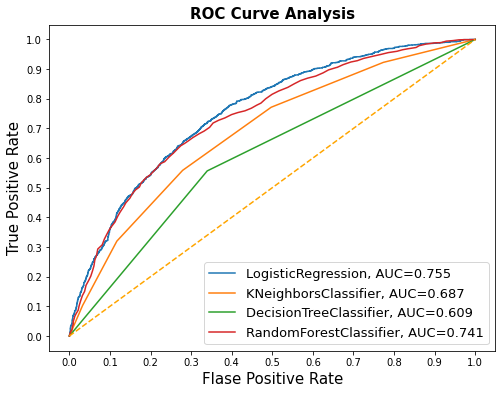

In [0]:
#Plot ROC
from sklearn.metrics import roc_curve, roc_auc_score

# list of classifiers
classifiers = [LogisticRegression(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(),
               RandomForestClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(train_rain[features], train_rain[target])
    yproba = model.predict_proba(validation_rain[features])[::,1]
    
    fpr, tpr, _ = roc_curve(validation_rain[target],  yproba)
    auc = roc_auc_score(validation_rain[target], yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()



### Discussion

* Briefly discuss what you are inferring from this plot

In the ROC plot below, Logistic Regression and Random forest classifier have higher area under curve,so they have better accuracy in predicting rain in the future. 

* Briefly discuss what features you used and whether you did some transformations on them. Why?

We did not use date because it is not a numerical feature nor a meaningful categorical feature. Also, at first we used tmrw_prcp as feature, but it result in accuracy of 1.0 for decision tree and random.forest classifier. We thought it didn't make sense to include it as feature since we do not know the future percipitation. 

* What features seemed important for your final model?


* Explain how you set up your validation.

At first, we split data into 0.2 and 0.8 as validation and test set, then use the training model to predict the validation dataset, then pick the one with the higherst validation accuracy.

* Explain what did you do to improve your initial predictions. Did it help?

As for decision tree model, we use gridsearch to find the best parameters and it did improve the accuray by 0.5% then we use random forest classifier and improve it by 0.2%.

## Predict the test set

In [0]:
#predict test round 1 with lr_regression
from google.colab import files
LR_pred = LR_model.predict(test_rain[features])
lr = pd.DataFrame(LR_pred)
lr = pd.DataFrame(LR_pred, index = np.arange(len(LR_pred)))
lr['index1'] = lr.index
lr.to_csv('lr_predict.csv', index = False)
files.download('lr_predict.csv')
print(lr)

        0  index1
0     0.0       0
1     1.0       1
2     1.0       2
3     1.0       3
4     1.0       4
...   ...     ...
6552  0.0    6552
6553  0.0    6553
6554  0.0    6554
6555  0.0    6555
6556  1.0    6556

[6557 rows x 2 columns]


In [0]:
#predict with random forest
RF_model = RandomForestClassifier().fit(train_rain[features], train_rain[target])
RF_pred = RF_model.predict(test_rain[features])
rf = pd.DataFrame(RF_pred, index = np.arange(len(RF_pred)))
rf['index1'] = rf.index
rf.to_csv('rf_predict.csv', index = False)
#files.download('rf_predict.csv')
print(rf)




        0  index1
0     0.0       0
1     1.0       1
2     1.0       2
3     0.0       3
4     0.0       4
...   ...     ...
6552  0.0    6552
6553  0.0    6553
6554  0.0    6554
6555  0.0    6555
6556  1.0    6556

[6557 rows x 2 columns]


In [0]:
knn_test_predict = KNN_model.predict(test_rain[features])
knn = pd.DataFrame(knn_test_predict)
knn.to_csv('knn_predict.csv', index = False)
files.download('knn_predict.csv')
print(knn)

        0
0     0.0
1     0.0
2     1.0
3     0.0
4     0.0
...   ...
6552  0.0
6553  1.0
6554  0.0
6555  0.0
6556  1.0

[6557 rows x 1 columns]
